In [1]:
import os
import sys
import numpy as np
import re
import pandas as pd
# import torch
# import torch.optim as optim
# import torch.nn as nn
# import torch.nn.functional as F
# # import torchvision
import pickle
from torch.nn.utils.rnn import pad_sequence
from unicodedata import normalize
from keras.preprocessing.text import Tokenizer
import keras
# from torchvision import transforms, datasets
from tqdm import tqdm
from time import sleep
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import pylab as pl
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [61]:
ordem_classes_antigo = ['área_eletricamente_inativa',
       'Bloqueio_de_ramo_direito', 'Bloqueio_de_ramo_esquerdo',
       'Bloqueio_de_ramo_direito_e_bloqueio_divisional_anterossuperior_do_ramo_esquerdo',
       'Bloqueio_intraventricular_inespecífico',
       'Sobrecarga_ventricular_esquerda_(critérios_de_Romhilt-Estes)',
       'Sobrecarga_ventricular_esquerda_(critérios_de_voltagem)',
       'Fibrilação_atrial', 'Flutter_atrial',
       'Bloqueio_atrioventricular_de_2°_grau_Mobitz_I',
       'Bloqueio_atrioventricular_de_2°_grau_Mobitz_II',
       'Bloqueio_atrioventricular_2:1', 'Bloqueio_atrioventricular_avançado',
       'Bloqueio_atrioventricular_total',
       'Pré-excitação_ventricular_tipo_Wolff-Parkinson-White',
       'Sistema_de_estimulação_cardíaca_normofuncionante',
       'Sistema_de_estimulação_cardíaca_com_disfunção',
       'Taquicardia_atrial_multifocal', 'Taquicardia_atrial',
       'Taquicardia_supraventricular', 'Corrente_de_lesão_subendocárdica',
       'Alterações_primárias_da_repolarização_ventricular',
       'Extrassístoles_supraventriculares', 'Extrassístoles_ventriculares',
       'Bradicardia_sinusal',
       'ECG_dentro_dos_limites_da_normalidade_para_idade_e_sexo',
       'Alterações_da_repolarização_ventricular_atribuídas_à_ação_digitálica',
       'Alterações_inespecíficas_da_repolarização_ventricular',
       'Alterações_secundárias_da_repolarização_ventricular',
       'Arritmia_sinusal',
       'Ausência_de_sinal_eletrocardiográfico_que_impede_a_análise',
       'Interferência_na_linha_de_base_que_não_impede_a_análise_do_ECG',
       'Ausência_de_sinal_eletrocardiográfico_que_não_impede_a_análise',
       'Traçado_com_qualidade_técnica_insuficiente',
       'Possível_inversão_de_posicionamento_de_eletrodos',
       'Baixa_voltagem_em_derivações_precordiais',
       'Baixa_voltagem_em_derivações_periféricas',
       'Bloqueio_atrioventricular_de_1°_grau',
       'Bloqueio_de_ramo_direito_e_bloqueio_divisional_posteroinferior_do_ramo_esquerdo',
       'Bloqueio_divisional_anterossuperior_do_ramo_esquerdo',
       'Bloqueio_divisional_posteroinferior_do_ramo_esquerdo',
       'Desvio_do_eixo_do_QRS_para_direita',
       'Desvio_do_eixo_do_QRS_para_esquerda',
       'Dissociação_atrioventricular_isorrítmica',
       'Distúrbio_de_condução_do_ramo_direito',
       'Distúrbio_de_condução_do_ramo_esquerdo', 'Intervalo_PR_curto',
       'Intervalo_QT_prolongado', 'Isquemia_subendocárdica',
       'Progressão_lenta_de_R_nas_derivações_precordiais', 'Pausa_sinusal',
       'Corrente_de_lesão_subepicárdica',
       'Corrente_de_lesão_subepicárdica_-_provável_infarto_agudo_do_miocárdio_com_supradesnivelamento_de_ST',
       'Repolarização_precoce', 'Ritmo_atrial_ectópico',
       'Ritmo_atrial_multifocal', 'Ritmo_idioventricular_acelerado',
       'Ritmo_juncional', 'Síndrome_de_Brugada', 'Sobrecarga_atrial_direita',
       'Sobrecarga_atrial_esquerda', 'Sobrecarga_biatrial',
       'Sobrecarga_biventricular', 'Sobrecarga_ventricular_direita',
       'Sobrecarga_ventricular_esquerda(_critérios_de_voltagem)',
       'Taquicardia_sinusal', 'Taquicardia_ventricular_não_sustentada',
       'Taquicardia_ventricular_sustentada',
       'Suspeita_de_Síndrome_de_Brugada_repetir_V1-V2_em_derivações_superiores',
       'Taquicardia_juncional', 'Batimento_de_escape_atrial',
       'Batimento_de_escape_supraventricular', 'Batimento_de_escape_juncional',
       'Batimento_de_escape_ventricular']
ordem_classes = ['área_eletricamente_inativa',
 'Bloqueio_de_ramo_direito',
 'Bloqueio_de_ramo_esquerdo',
 'Sobrecarga_ventricular_esquerda_(critérios_de_Romhilt-Estes)',
 'Fibrilação_atrial',
 'Flutter_atrial',
 'Bloqueio_atrioventricular_de_2°_grau_Mobitz_I',
 'Pré-excitação_ventricular_tipo_Wolff-Parkinson-White',
 'Sistema_de_estimulação_cardíaca_normofuncionante',
 'Taquicardia_atrial_multifocal',
 'Taquicardia_supraventricular',
 'Alterações_primárias_da_repolarização_ventricular',
 'Extrassístoles_supraventriculares',
 'Extrassístoles_ventriculares',
 'Bradicardia_sinusal',
 'ECG_dentro_dos_limites_da_normalidade_para_idade_e_sexo',
 'Alterações_inespecíficas_da_repolarização_ventricular',
 'Alterações_secundárias_da_repolarização_ventricular',
 'Arritmia_sinusal',
 'Ausência_de_sinal_eletrocardiográfico_que_impede_a_análise',
 'Ausência_de_sinal_eletrocardiográfico_que_não_impede_a_análise',
 'Possível_inversão_de_posicionamento_de_eletrodos',
 'Bloqueio_atrioventricular_de_1°_grau',
 'Bloqueio_divisional_anterossuperior_do_ramo_esquerdo',
 'Bloqueio_divisional_posteroinferior_do_ramo_esquerdo',
 'Desvio_do_eixo_do_QRS_para_direita',
 'Desvio_do_eixo_do_QRS_para_esquerda',
 'Distúrbio_de_condução_do_ramo_direito',
 'Distúrbio_de_condução_do_ramo_esquerdo',
 'Intervalo_PR_curto',
 'Intervalo_QT_prolongado',
 'Isquemia_subendocárdica',
 'Progressão_lenta_de_R_nas_derivações_precordiais',
 'Ritmo_atrial_ectópico',
 'Sobrecarga_atrial_esquerda',
 'Taquicardia_sinusal']

In [3]:
#Loading Data
gold         = pd.read_csv("../../light_data/gold_standard.csv")
labels = np.load("../../light_data/gold_labels.npy")

In [4]:
levDf = pd.read_csv("../../../data/resultados/scores/scores_full.csv")
levDf = levDf[levDf["id_exame"].isin(gold["id_exame"])]
levDf = levDf.reset_index()
# labels = []
# for row in levDf.itertuples():
#     labels.append([row[1]] + [row[3:]])
# np.save("labelsSiglas.npy", np.array(labels))
gold = gold[gold["id_exame"].isin(levDf["id_exame"])]

In [5]:
y_test = []
y_score = []

for ID in levDf['id_exame']:
    try:
        test = gold['classes'][gold[gold['id_exame'] == ID].index[0]]
        score = levDf[' scorings'][levDf[levDf['id_exame'] == ID].index[0]]
        if type(test) is str and type(score) is str:
            y_score.append(score[1:-1].split(','))
            y_test.append(test.split(','))
    except:
        print(ID)

In [9]:
y_test = [[int(num) for num in row if num != '' and num != '?????'] for row in y_test]

In [10]:
y_score = [[float(num) for num in row] for row in y_score]

In [11]:
y_true = [[1 if i in row else 0 for i in range(74)] for row in y_test]

In [14]:
y_true, y_test = y_test, y_true

In [15]:
#Results've been calculated.
#Lets analyze em

#This is a function to check manually the performance of the network
def analyze(n):
    tr = y_test[n]
    sc = y_score[n]
    pr = y_bin[n]
    text = gold["texto"][n]
    print("Texto:")
    print(text)
    print()
    print("Classes no texto:")
    for i in range(74):
        if(tr[i] == 1):
            print(ordem_classes[i])
    
    print()
    print("Classes Predizidas:")
    for i in range(74):
        if(pr[i] == 1):
            print(ordem_classes[i])

In [70]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

#Function to turn score in binary
#Here the thresholds must be a list of 74 numbers
def getMetrics(y_test, y_score, thresholds):
    
    #First we turn into binary
    y_bin = []
    for row in y_score:
        ans = []
        for i in range(74):
            if row[i] > thresholds[i]:
                ans.append(1)
            else:
                ans.append(0)
        y_bin.append(np.array(ans))
    y_bin = np.array(y_bin)
    
    #Then we calculate
    target_names = ["(" + ordem_classes_antigo[i] + ") Class" + str(i) for i in range(74)]
    precision = dict()
    recall = dict()
    f1 = dict()
    sup = dict()
    for i in range(74):
        precision[i], recall[i], f1[i], sup[i] = precision_recall_fscore_support(y_test[:,i], y_bin[:,i], average = 'binary')
    return precision, recall, f1, sup

In [88]:
sup = [[y_test[:,i].sum(), 1] if (y_test[:,i].sum()) > 10 and (y_test[:,i].sum()) != 16 else [y_test[:,i].sum(), 0] for i in range(74)]

In [89]:
pd.DataFrame(sup, columns = ["n_of_ocurrences", "valid"]).to_csv("../../../data/new_classes.csv")

In [90]:
np.save("../../../data/new_classes.npy", np.array(sup))

In [91]:
sup = np.load("../../../data/new_classes.npy")

In [95]:
[limits[i] for i in range(74) if sup[i][1]]

[60.0,
 79.167,
 72.0,
 93.548,
 61.905,
 50.0,
 86.364,
 92.0,
 62.857,
 66.667,
 93.548,
 88.0,
 90.909,
 92.857,
 73.684,
 98.214,
 81.132,
 84.314,
 75.0,
 94.737,
 68.75,
 97.143,
 63.462,
 64.516,
 79.412,
 80.0,
 86.486,
 94.737,
 77.778,
 69.565,
 88.889,
 66.667,
 71.429,
 73.077,
 73.684]

In [93]:
#z = 0.1
#while(z < 1):
precision, recall, f1, _ = getMetrics(y_test, y_score, limits)
# sup = [y_test[:,i].sum() for i in range(74)]
#   z += 0.1
# fla = sorted(f1.items(), key=lambda x: x[1], reverse=True)
df = pd.DataFrame(columns = ["Class", "Precision", "Recall", "F1", "Number of Occurrences in Test"])
for row in fla:
    n = row[0]
    new_row = {'Class': str(ordem_classes_antigo[n]), 'Precision': precision[n], 'Recall': recall[n], 'F1': f1[n],\
               "Number of Occurrences in Test": int(sup[n][0])}
    if(sup[n][1]):
        df = df.append(new_row, ignore_index = True)
# df = df.set_index("Class")

In [94]:
df

,Class,Precision,Recall,F1,Number of Occurrences in Test
0,Flutter_atrial,0.970588,1.000000,0.985075,33
1,Ausência_de_sinal_eletrocardiográfico_que_impe...,1.000000,0.965517,0.982456,29
2,Bradicardia_sinusal,0.980769,0.944444,0.962264,54
3,Sistema_de_estimulação_cardíaca_normofuncionante,0.967742,0.937500,0.952381,64
4,Ritmo_atrial_ectópico,0.909091,1.000000,0.952381,30
5,Bloqueio_de_ramo_esquerdo,0.962025,0.926829,0.944099,82
6,Bloqueio_de_ramo_direito,0.900585,0.974684,0.936170,158
7,Possível_inversão_de_posicionamento_de_eletrodos,0.933333,0.933333,0.933333,30
8,Intervalo_QT_prolongado,0.965517,0.903226,0.933333,31
9,Fibrilação_atrial,0.871429,1.000000,0.931298,61


In [373]:
df.to_csv("check.csv")

In [360]:
df.to_csv("check it.csv")

In [18]:
y_test = np.array(y_test)
y_score = np.array(y_score)

In [19]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
for i in range(74):
    fpr[i], tpr[i], thresholds[i] = metrics.roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

/home/speed/joao.pedrosa/miniconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [357]:
import math
#Tá é o seguinte
#Eu to pressupondo q se eu minimizar a distancia da curva ROC no ponto superior esquerdo eu vou achar o melhor threshold possivel
#É essa a teoria
limits = []
for j in range(74):
    dist = 2
    idist = 0
    for i in range(len(thresholds[j])):
        x = fpr[j][i]
        y = 1 - tpr[j][i]
        distat = math.sqrt((x * x) + (y * y))
        if(distat < dist):
            idist = i
            dist = distat
    limits.append(thresholds[j][idist])
#Funcionou bem mal :c

In [34]:
for row in finalResult[:,j]:
            ans = []
            if row > threshold:
                ans.append(1)
            else:
                ans.append(0)

In [20]:
limits = []
from sklearn.metrics import precision_recall_fscore_support
for j in range(74):
    bigf1 = 0
    for threshold in thresholds[j]:
        y_bin = []
        for row in y_score[:,j]:
            if row > threshold:
                y_bin.append(1)
            else:
                y_bin.append(0)
        y_bin = np.array(y_bin)
        precision, _, f1, _ = precision_recall_fscore_support(y_test[:,j], y_bin, average = 'binary')
        
        if(precision > bigf1 and precision > 0):
            bigf1 = precision
            maxi = threshold
    limits.append(maxi)

/home/speed/joao.pedrosa/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/speed/joao.pedrosa/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


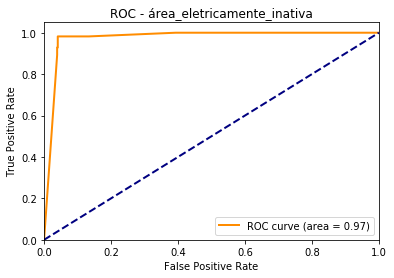

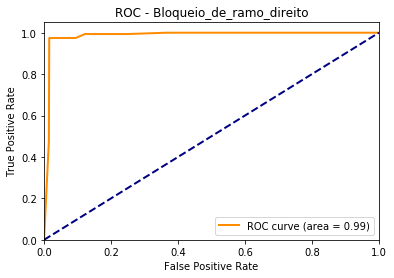

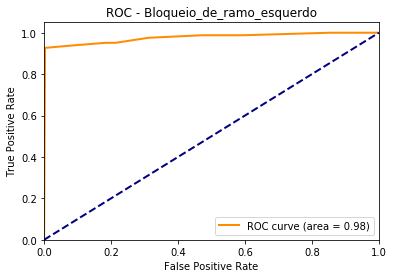

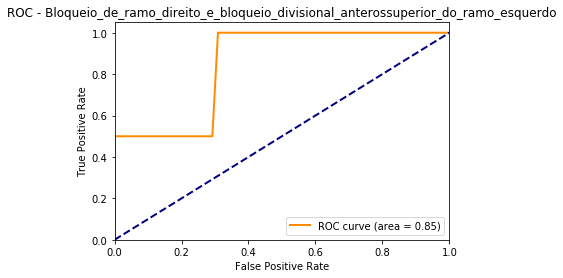

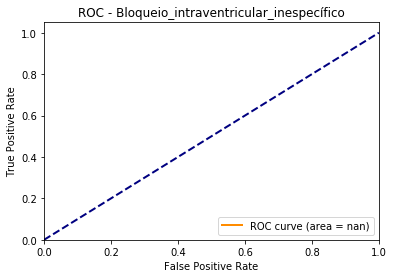

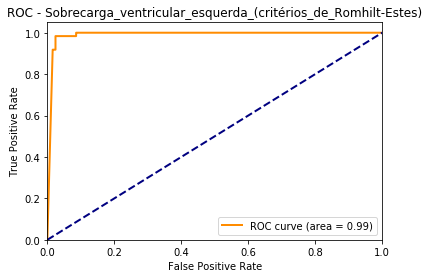

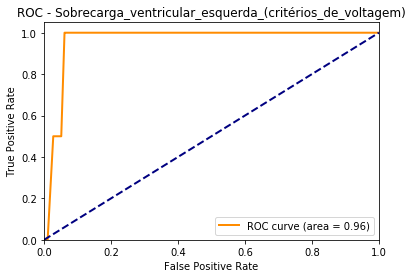

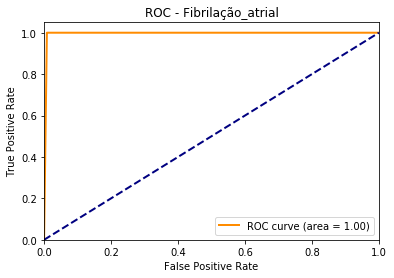

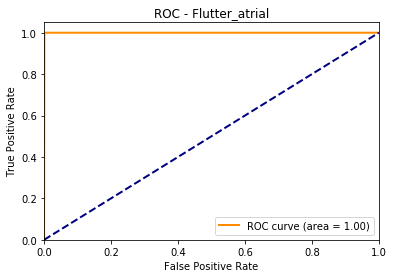

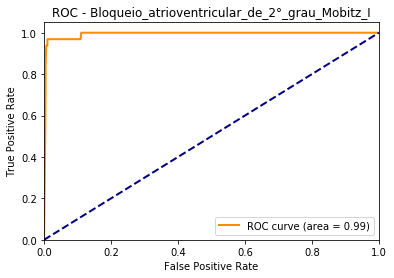

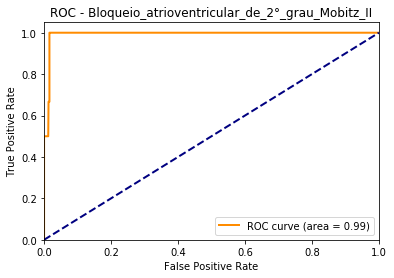

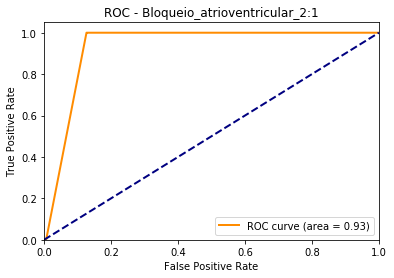

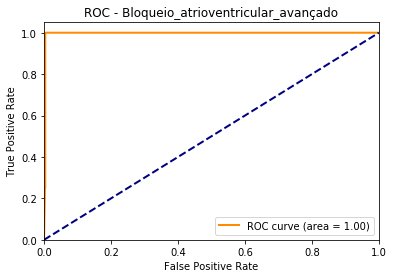

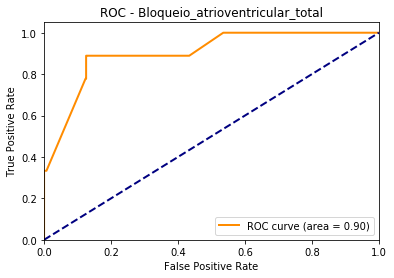

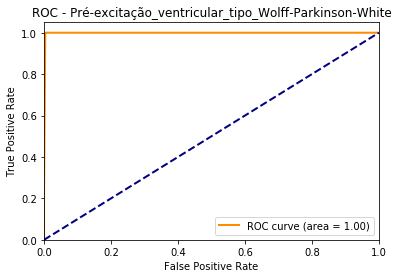

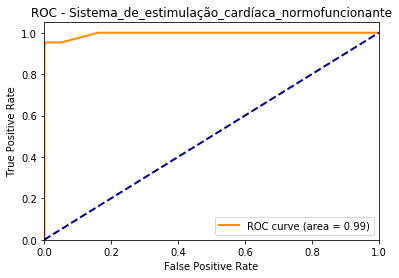

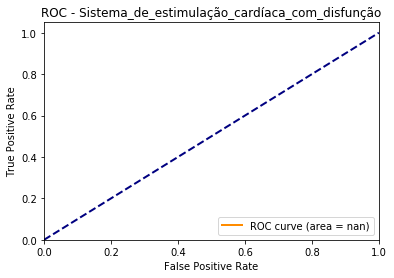

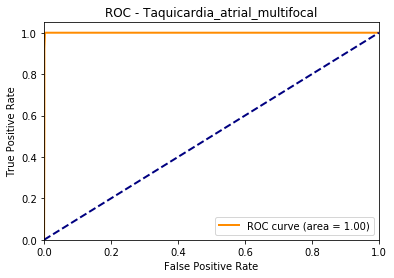

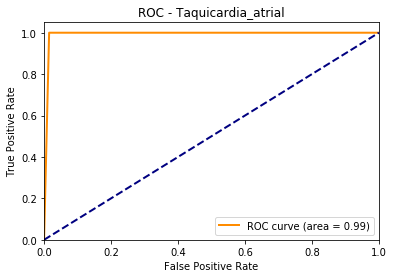

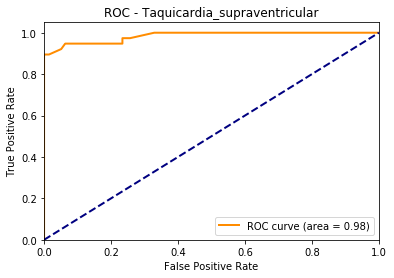

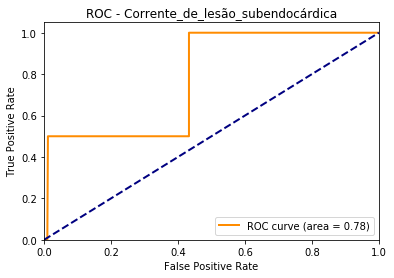

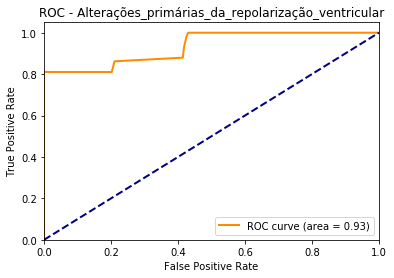

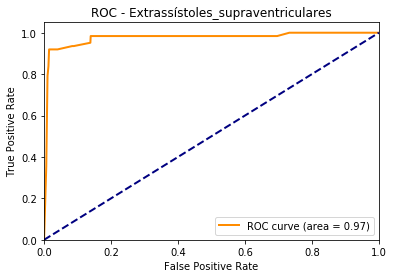

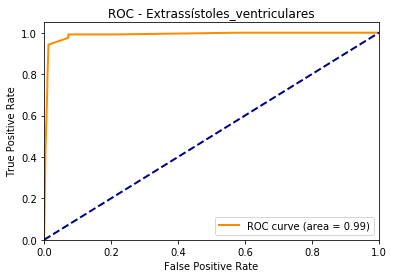

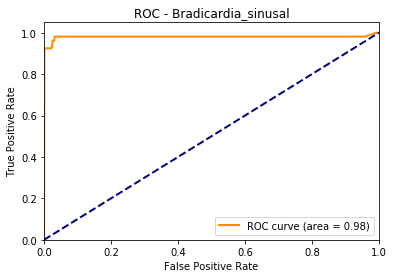

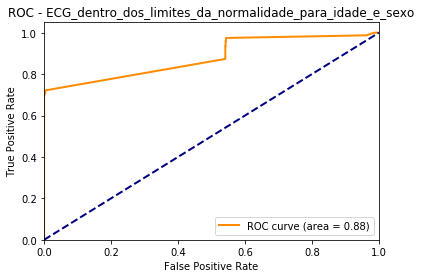

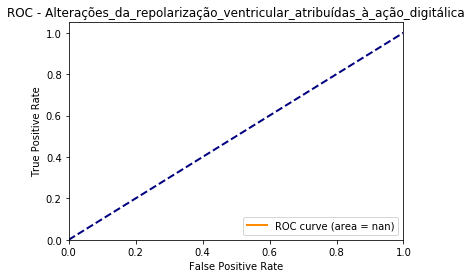

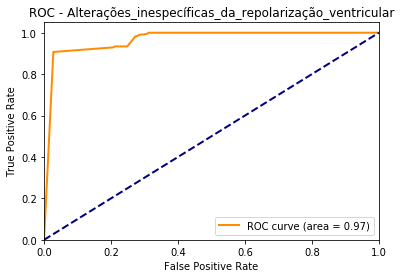

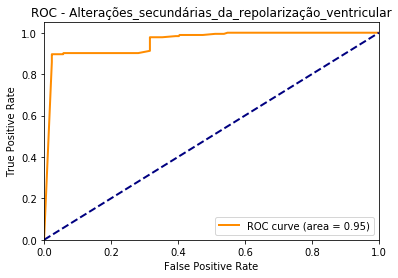

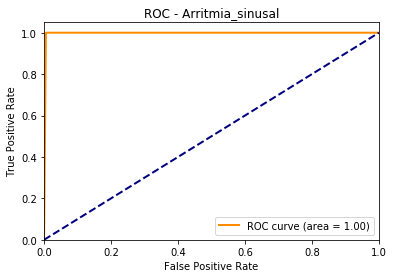

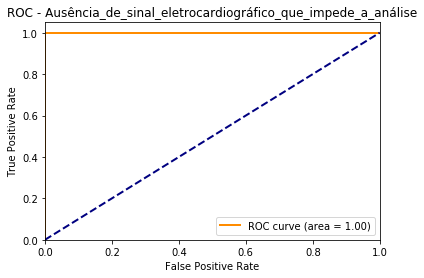

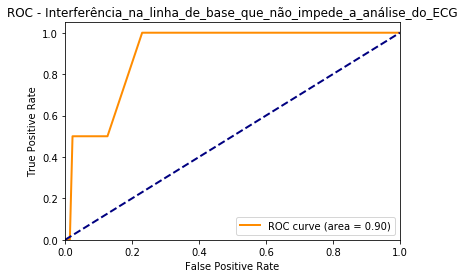

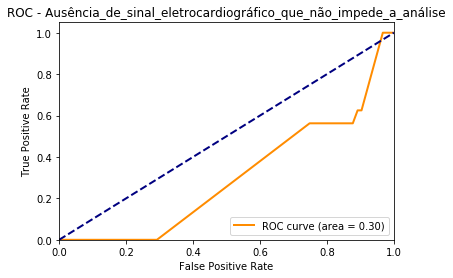

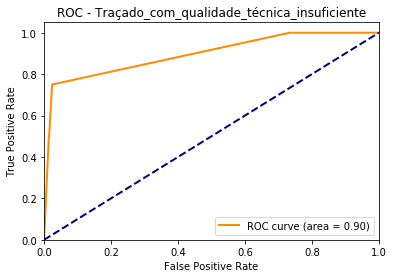

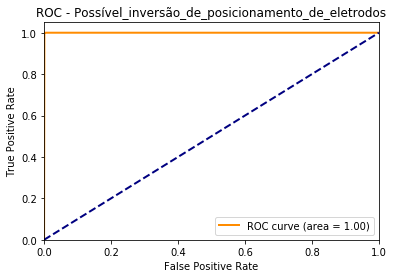

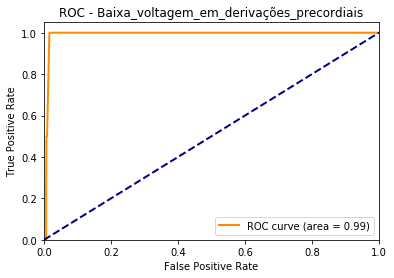

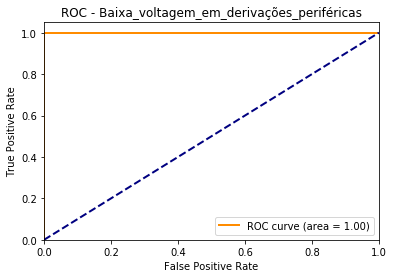

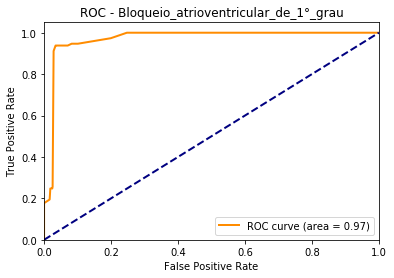

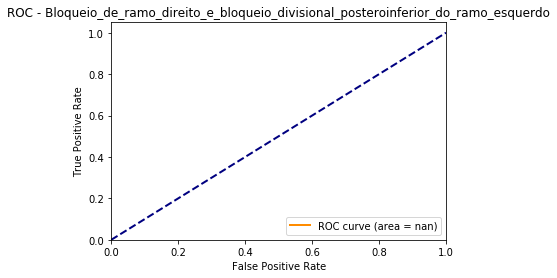

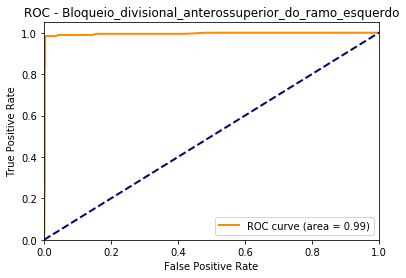

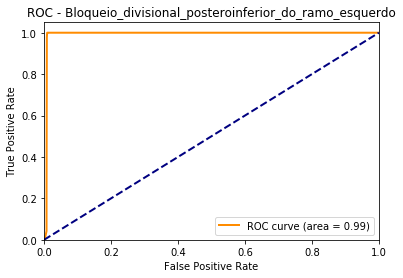

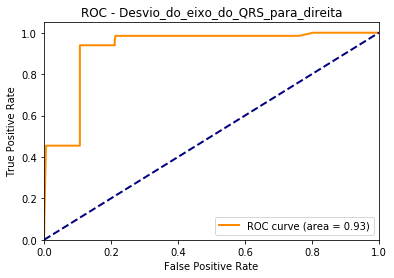

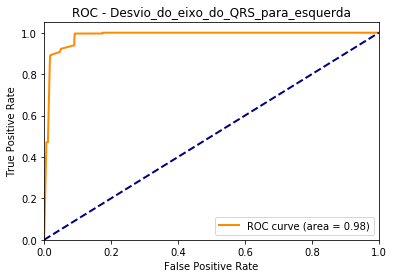

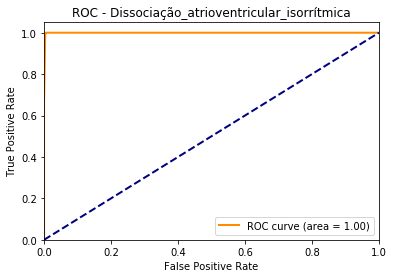

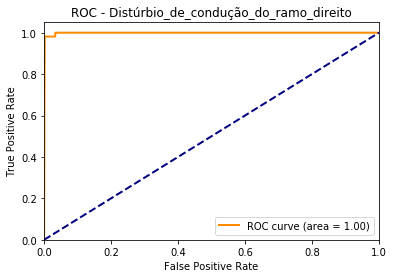

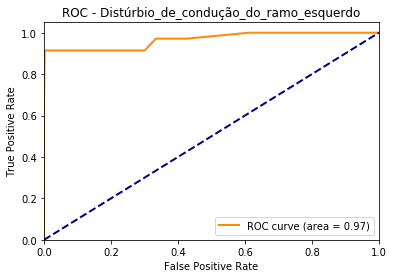

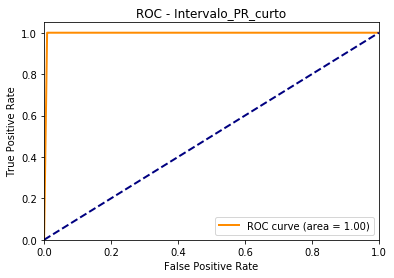

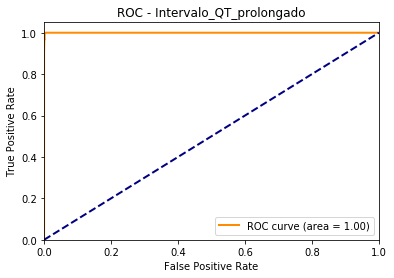

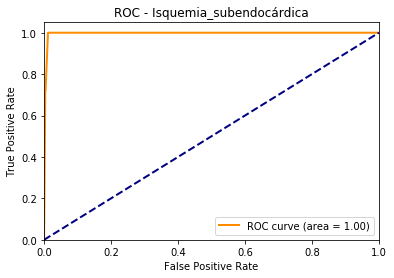

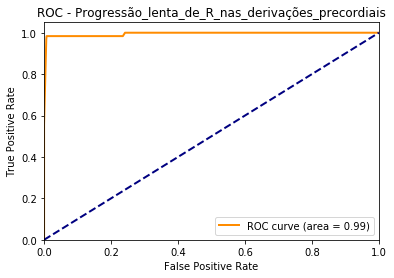

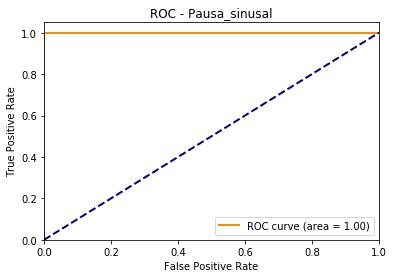

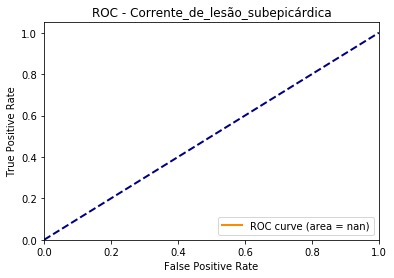

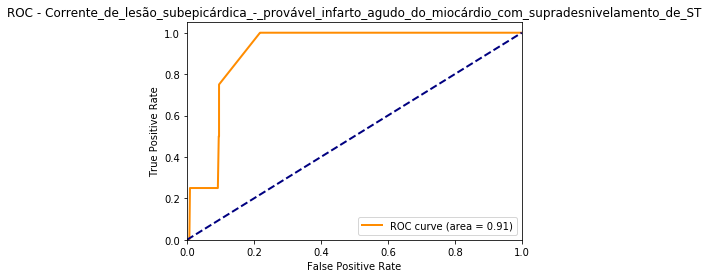

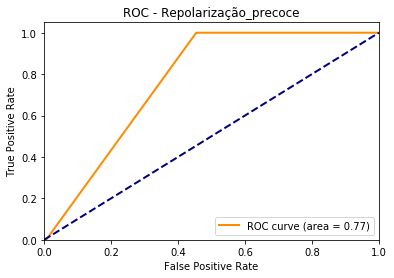

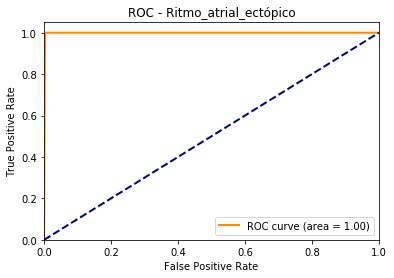

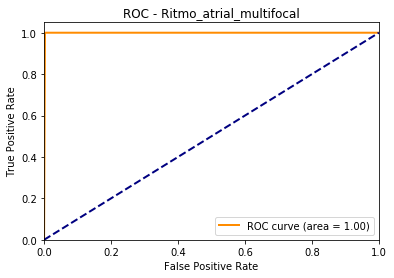

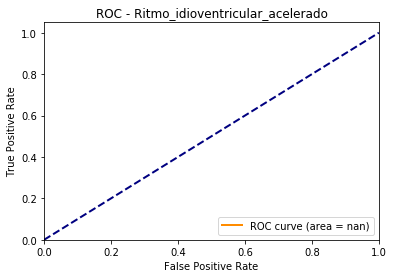

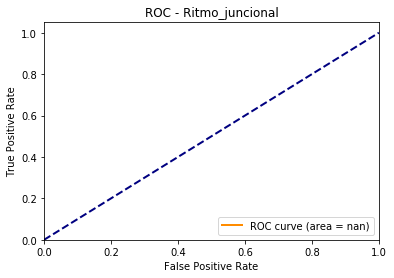

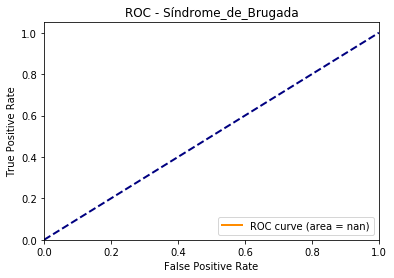

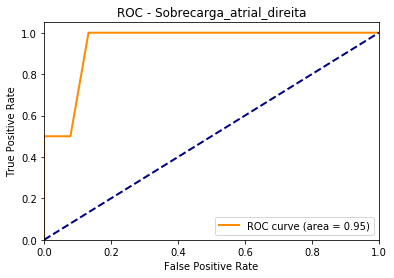

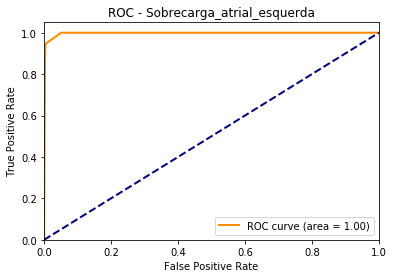

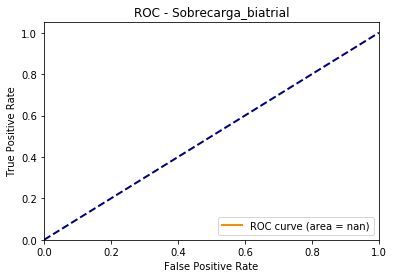

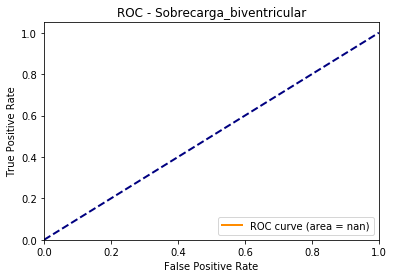

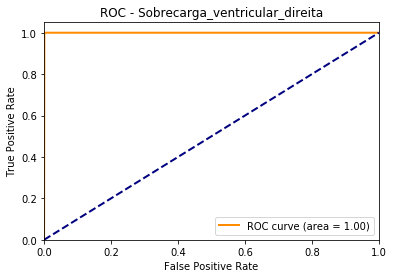

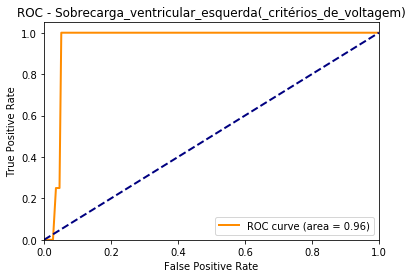

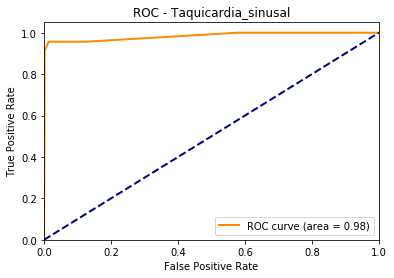

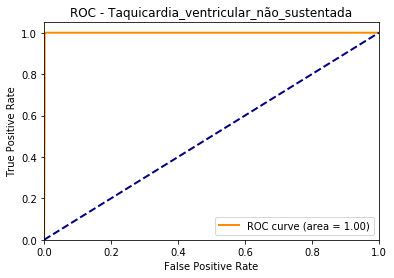

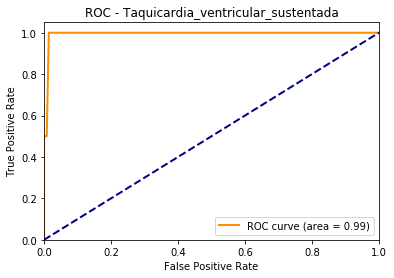

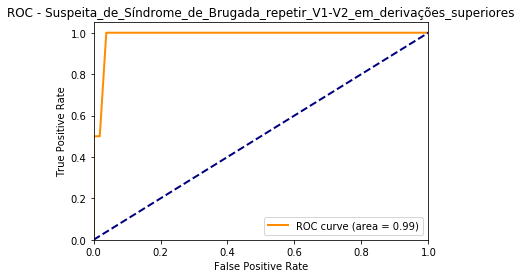

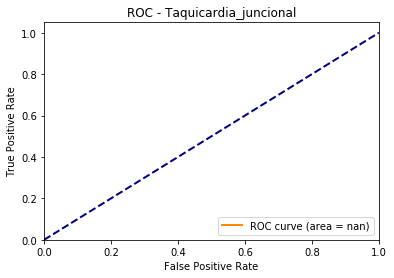

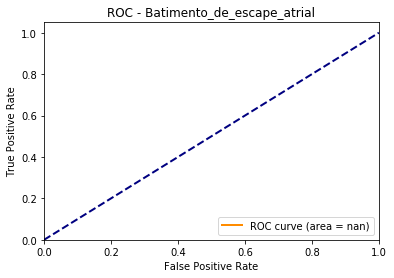

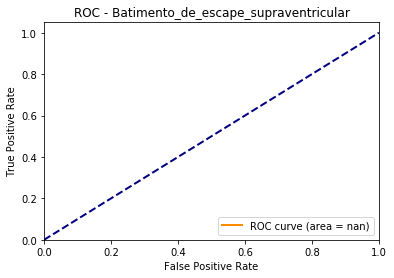

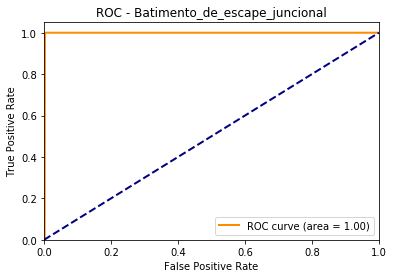

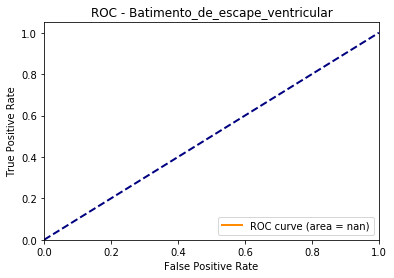

In [350]:
#ROC curves
for i in range(74):
    nClass = i
    plt.figure()
    lw = 2
    plt.plot(fpr[nClass], tpr[nClass], color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[nClass])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC - ' + ordem_classes[nClass])
    plt.legend(loc="lower right")
#     plt.savefig('../../test_data/testROC/' + ordem_classes[nClass] + '.png')
    plt.show()